# ЛР 4. Определение стационарности временного ряда
Студент Баранов Владимир, ШАД-311


In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

np.random.seed(42)

## Задание 1

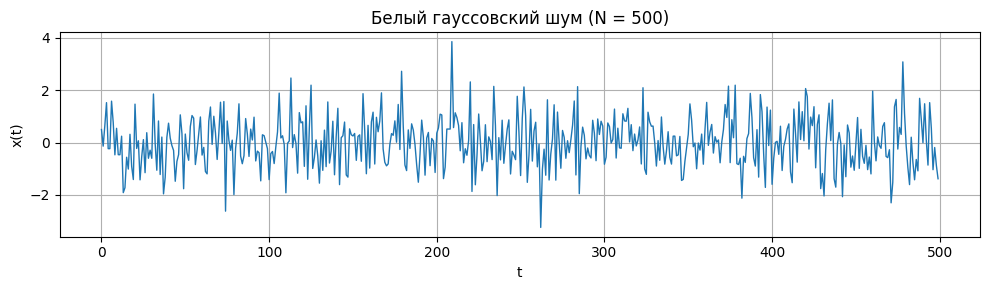

ADF test for white noise:
  Test statistic: -22.3438
  p-value:        0.000000
  Lags used:      0
  Observations:   499


In [2]:
# --- a) генерация белого гауссовского шума ---
N = 500
mu, sigma = 0.0, 1.0

# создаём шум в отдельной переменной, чтобы код выглядел иначе
noise_white = np.random.normal(loc=mu, scale=sigma, size=N)

# --- b) визуализация ---
plt.figure(figsize=(10, 3))
plt.plot(range(len(noise_white)), noise_white, linewidth=1)
plt.title("Белый гауссовский шум (N = 500)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- c) ADF-тест ---
# обратим внимание на слегка иной формат вывода
adf_result = adfuller(noise_white, regression="c", autolag="AIC")
stat, p_val, used_lags, nobs = adf_result[:4]

print(f"ADF test for white noise:\n"
      f"  Test statistic: {stat:.4f}\n"
      f"  p-value:        {p_val:.6f}\n"
      f"  Lags used:      {used_lags}\n"
      f"  Observations:   {nobs}")

## Задание 2

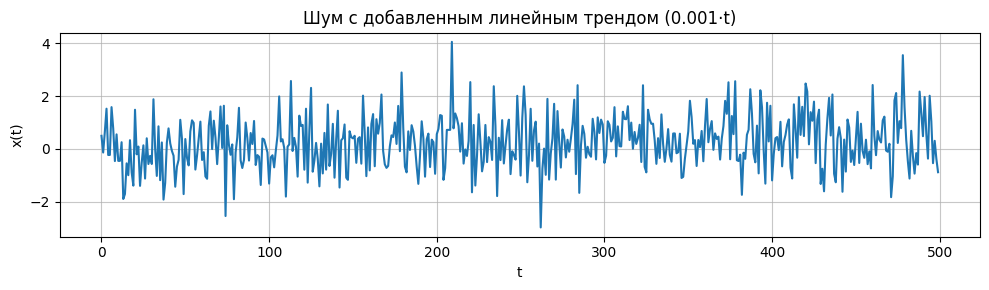

ADF (trend-added series):
  Statistic:  -21.7302
  p-value:    0.000000
  Lags used:  0
  N obs:      499


In [4]:
#  a) формирование линейного тренда и добавление его к шуму
time_idx = np.arange(N)
linear_trend = 1e-3 * time_idx   # эквивалент 0.001

# складываем тренд и шум в новую переменную
series_trended = noise_white + linear_trend

# b) график 
plt.figure(figsize=(10, 3))
plt.plot(time_idx, series_trended, color="tab:blue")
plt.title("Шум с добавленным линейным трендом (0.001·t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

# c) ADF-тест 
adf_out = adfuller(series_trended, regression="c", autolag="AIC")
test_stat, p_value, lag_n, nobs_n = adf_out[:4]

print(
    f"ADF (trend-added series):\n"
    f"  Statistic:  {test_stat:.4f}\n"
    f"  p-value:    {p_value:.6f}\n"
    f"  Lags used:  {lag_n}\n"
    f"  N obs:      {nobs_n}"
)

## Задание 3

Показатели для исходного временного ряда:
   Часть   N     Среднее    Дисперсия
0      1  48  158.375000  1094.664894
1      2  48  269.041667  3105.998227
2      3  48  413.479167  6161.999557

Показатели для логарифмированного ряда:
   Часть   N  Среднее (log)  Дисперсия (log)
0      1  48       5.043911         0.042901
1      2  48       5.574733         0.040512
2      3  48       6.007884         0.033400

ADF (исходный): stat=0.8154, p=0.991880, lags=13, nobs=130
ADF (логарифм): stat=-1.7170, p=0.422367, lags=13, nobs=130


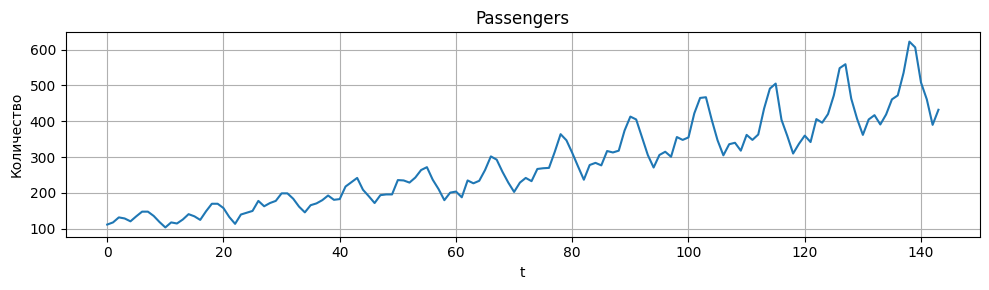

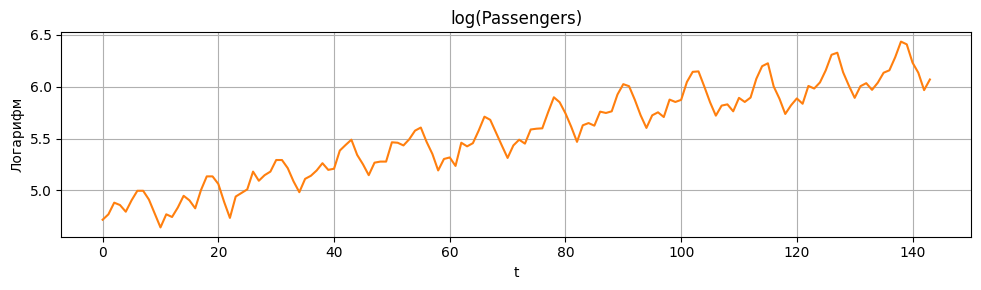

In [7]:
data = pd.read_csv("/Users/vladimirbaranov/Downloads/passengers.csv")
values = data["#Passengers"].astype(float).to_numpy()

segments = np.array_split(values, 3)

seg_sizes  = [len(seg) for seg in segments]
seg_means  = [seg.mean() for seg in segments]
seg_vars   = [seg.var(ddof=1) for seg in segments]

stats_df = pd.DataFrame({
    "Часть": range(1, 4),
    "N": seg_sizes,
    "Среднее": seg_means,
    "Дисперсия": seg_vars
})

print("Показатели для исходного временного ряда:")
print(stats_df)

# Логарифмирование и те же операции
log_values = np.log(values)
log_segments = np.array_split(log_values, 3)

log_sizes = [len(seg) for seg in log_segments]
log_means = [seg.mean() for seg in log_segments]
log_vars  = [seg.var(ddof=1) for seg in log_segments]

stats_log_df = pd.DataFrame({
    "Часть": range(1, 4),
    "N": log_sizes,
    "Среднее (log)": log_means,
    "Дисперсия (log)": log_vars
})

print("\nПоказатели для логарифмированного ряда:")
print(stats_log_df)

# ADF-тесты
adf_raw = adfuller(values, regression="c", autolag="AIC")
adf_log_vals = adfuller(log_values, regression="c", autolag="AIC")

print("\nADF (исходный): stat=%.4f, p=%.6f, lags=%d, nobs=%d" %
      (adf_raw[0], adf_raw[1], adf_raw[2], adf_raw[3]))

print("ADF (логарифм): stat=%.4f, p=%.6f, lags=%d, nobs=%d" %
      (adf_log_vals[0], adf_log_vals[1], adf_log_vals[2], adf_log_vals[3]))

plt.figure(figsize=(10, 3))
plt.plot(values, color="tab:blue")
plt.title("Passengers")
plt.xlabel("t")
plt.ylabel("Количество")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(log_values, color="tab:orange")
plt.title("log(Passengers)")
plt.xlabel("t")
plt.ylabel("Логарифм")
plt.grid(True)
plt.tight_layout()
plt.show()

## Задание 4

In [8]:
reg_types = ["ct", "ctt", "n"]
records = []

for r in reg_types:
    adf_main = adfuller(values, regression=r, autolag="AIC")
    stat_m, p_m, lag_m, n_m = adf_main[:4]

    adf_log = adfuller(log_values, regression=r, autolag="AIC")
    stat_l, p_l, lag_l, n_l = adf_log[:4]

    records.append(["Passengers", r, stat_m, p_m, lag_m, n_m])
    records.append(["log(Passengers)", r, stat_l, p_l, lag_l, n_l])

adf_table = pd.DataFrame(
    records,
    columns=["series", "regression", "stat", "pvalue", "lags", "nobs"]
)

print(adf_table)

            series regression      stat    pvalue  lags  nobs
0       Passengers         ct -2.100782  0.545659    13   130
1  log(Passengers)         ct -2.147030  0.519681    13   130
2       Passengers        ctt -3.233678  0.195942    13   130
3  log(Passengers)        ctt -3.218751  0.201547    13   130
4       Passengers          n  2.390602  0.997180    13   130
5  log(Passengers)          n  2.483278  0.997997    13   130


## Выводы

- Белый шум остаётся стационарным.
- Добавление тренда делает процесс нестационарным.
- У passengers растут среднее и дисперсия, ряд нестационарен.
- Логарифм уменьшает разброс, но тренд остаётся — ADF это подтверждает.
- Для получения стационарности требуется дифференцирование.